In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9584528890767716
MAE: 0.6519180327868855


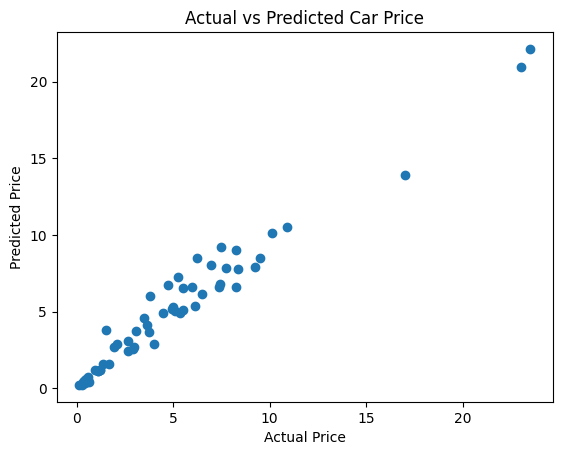

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()


In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Sort & take top 10
top_features = importance_df.sort_values(
    by='Importance', ascending=False
).head(10)



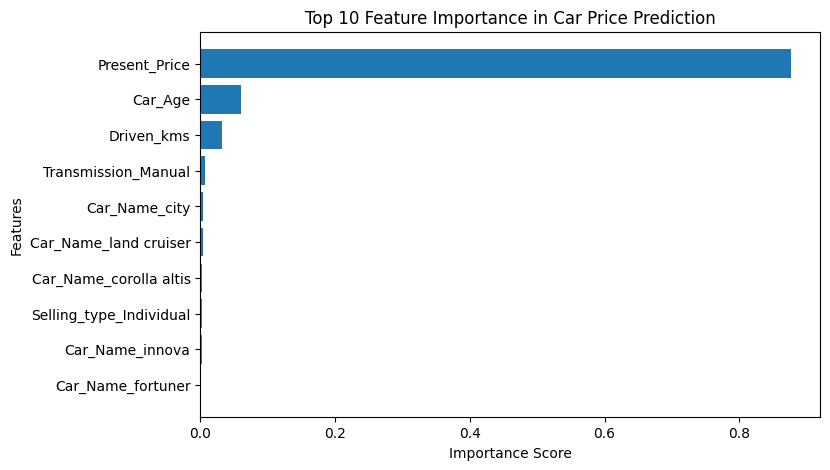

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance in Car Price Prediction")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

rf_cv = RandomizedSearchCV(
    rf, params, cv=5, scoring='r2', n_iter=10
)

rf_cv.fit(X_train, y_train)

best_model = rf_cv.best_estimator_


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, "R2 Score:", r2_score(y_test, pred))


Linear Regression R2 Score: 0.5997023481944902
Decision Tree R2 Score: 0.9645060193960456
Random Forest R2 Score: 0.9623932314881303


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model, X, y, cv=5, scoring='r2'
)

print("Average CV Score:", cv_scores.mean())


Average CV Score: 0.40242163851475093


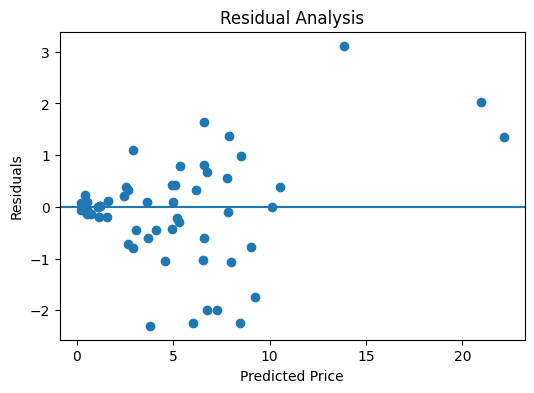

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


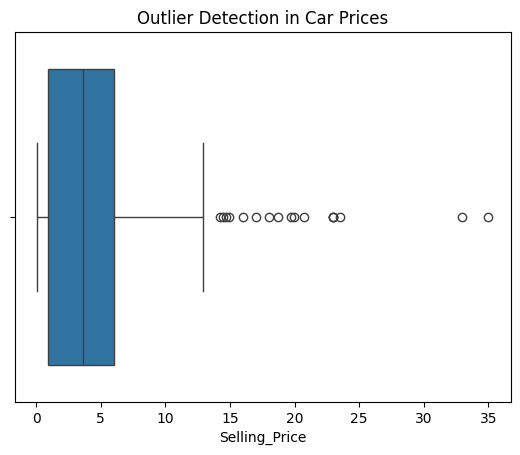

In [ ]:
sns.boxplot(x=df['Selling_Price'])
plt.title("Outlier Detection in Car Prices")
plt.show()


In [ ]:
def predict_price(input_data):
    return best_model.predict([input_data])
